# Matplotlib: Introduction to Graphing and Plotting in Python

## Success Criteria
By the end of the lecture I will be successful if I can...
1. State why matplotlib and Jupyter pair well together.
2. Name, recognize, and use the two interfaces to matplotlib.
3. Be able to import `pyplot` and set up a professional style.
4. Understand subplots, figures, and axes. 
5. State the syntax needed to:
    - Make titles and labels.
    - Draw scatterplots on an axis.
    - Draw line plots on an axis.
    - Draw a bar chart on an axis.


## Introduction

There are many libraries for doing plotting in Python. Some you may encounter
* Plotly
* Bokeh
* **Matplotlib**
* **Seaborne**
* **Pandas**
* ggplot (port of R package of same name)

All of these aim to solve the same problem: allowing you to visualize your data.
While everyone has different opinions about what library is best, almost everyone knows and has used **matplotlib**.

### Why matplotlib?:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
    * Learn more about using $\LaTeX$ formatting with matplotlib [here](https://matplotlib.org/tutorials/text/usetex.html)
* Great control of every element in a figure, including figure size and DPI(Dots per Inches).
<!-- determines how many pixels the figure comprises. The default dpi in matplotlib is 100 -->
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* Widely used and understood library

In an effort to make easy things easy, and hard things possible, matplotlib has a couple of different levels at which it can be accessed, we will typically prefer the OO interface in the dsi.

They are:

| Level | Control | Complexity |
|-------|---------|------------|
| plt | minimal, fast interface for plots, annotations | low |
| OO interface w/ pyplot | fine-grained control over figure, axes, etc. | medium |


### Why Juptyter?

Jupyter notebooks display plots inline.  By putting the output graph *right* next to the code it makes changing and iterating on visualizations much easier.

### Check your version:

In [1]:
import matplotlib
matplotlib.__version__

'3.2.2'

## Standard Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #standards should be followed

Note: The default style in matplotlib is unattractive and not colorblind friendly, so I recommend always switching to a more professional style.  

For presentations increse font size and use sans serif fonts.

In [3]:
plt.style.use('ggplot') # Experiment with other styles to see for yourself which is best
#set fonts and size
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'sans'})

## Two Interfaces

### plt example

In [4]:
x_data = np.arange(0, 4, .011)

y1_data = np.sin(x_data)
y2_data = np.cos(x_data)

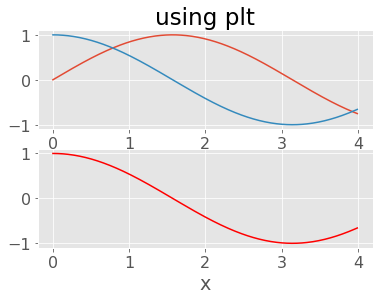

In [5]:
plt.subplot(2, 1, 1)      # #rows, #cols, plotnumber
plt.plot(x_data, y1_data) # First plot
plt.plot(x_data, y2_data) # Second plot in same subplot
plt.title('using plt')    # plot title

plt.subplot(2, 1, 2)                 # #rows, #cols, plotnumber
plt.plot(x_data, y2_data, color='r') # Second plot in a separate subplot
plt.xlabel('x')

plt.show()

### Question
What is `plt`?

### Weird

`plt` was imported as a library, but it appears to be keeping some state between the last two lines above, behavior that we'd usually associate with objects.

In fact, `plt`, operates in a not-very-pythonic way.

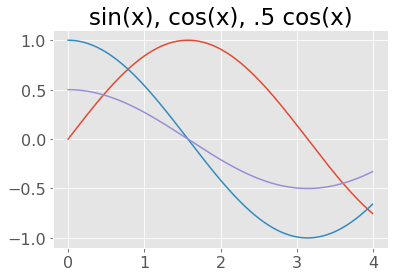

In [6]:
plt.plot(x_data, y1_data)
#We can actually keep adding state here, and it will be reflected when we finally call show.
plt.plot(x_data, y2_data)
plt.plot(x_data, .5 * y2_data)
plt.title("sin(x), cos(x), .5 cos(x)")
plt.show()

Text(0, 0.5, 'Y axis')

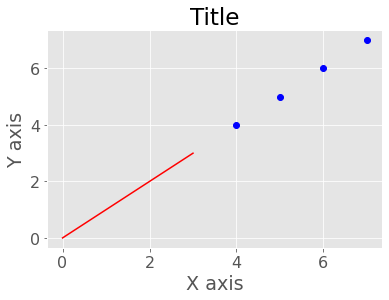

In [7]:
# we can put multiple datasets on same plot
plt.plot(range(4), range(4), 'r-', 
         range(4, 8), range(4, 8), 'bo')
plt.title('Title')
plt.xlabel('X axis')
plt.ylabel('Y axis')

If you thought it was strange that we were working in Python, but there didn't seem to be any objects required to make our image, join the club!

### Let's do it the object oriented way.
The basic components (think objects) in `pyplot` are figures and axes.

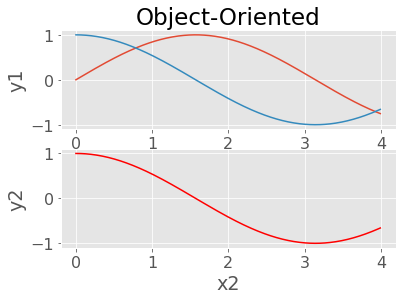

In [8]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1) # or 211
ax1.plot(x_data, y1_data)
ax1.plot(x_data, y2_data)
ax1.set_title('Object-Oriented')
ax1.set_xlabel('x1')
ax1.set_ylabel('y1')

ax2 = fig.add_subplot(2, 1, 2) # or 212
ax2.plot(x_data, y2_data, color='r')
ax2.set_xlabel('x2')
ax2.set_ylabel('y2')

plt.show()

In this example, the fact that state is maintained is less surprising.

Let's make the plot larger, and let's put on subplot on top of the other!

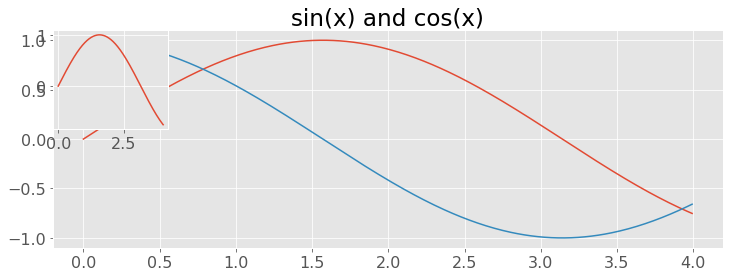

In [9]:
fig = plt.figure(figsize=(12,4))     # <-- figsize!

ax = fig.add_subplot(111)    # #rows, #cols, plotnumber
ax2 = fig.add_subplot(251)   # <-- notice the different #rows, #cols

ax.plot(x_data, y1_data)
ax.plot(x_data, y2_data)
ax.set_title('sin(x) and cos(x)')

ax2.plot(x_data, y1_data)

plt.show()

# Mix 'n' Match

Turns out, you can combine `plt` and object-oriented approach.

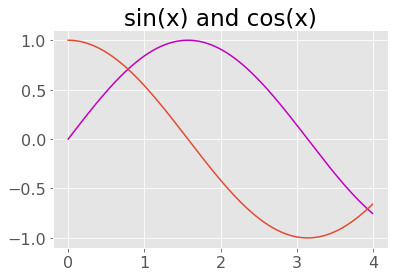

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data, color='m')
ax.plot(x_data, y2_data)
plt.title('sin(x) and cos(x)')
plt.show()

# Why should we use the OO oriented approach?

If we want to exercise fine-grained control over our plots that isn't offered via the `plt` shortcuts.

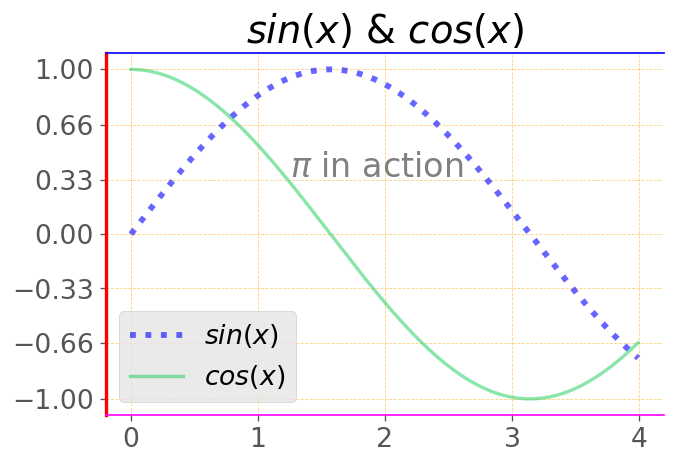

In [11]:
# Don't worry too much about what is happening here, we'll revisit everything happening later
fig = plt.figure(figsize=(6,4), dpi=120)
ax = fig.add_subplot(111,facecolor='white')
ax.plot(x_data, y1_data, label='$sin(x)$', color='b', alpha=.6, linewidth=3.5, linestyle=':')
ax.plot(x_data, y2_data, label='$cos(x)$', color='#15cc55', alpha=.5, linewidth=2.0, linestyle='-')
ax.set_title('$sin(x)$ & $cos(x)$')

yticks = [-1, -.66,-.33, 0, .33, .66, 1]
ax.set_yticks(yticks)

ax.grid(color='orange', alpha=0.5, linestyle='dashed', linewidth=0.5)
ax.spines['bottom'].set_color('magenta')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

ax.text(1.25, .35, r"$\pi$ in action", fontsize=20, color="gray")

ax.legend(loc=3)
plt.show()

## How does this work?

### Figures and Axis

The basic components in `pyplot` are **figures** and **axes**.

  - A **figure** object represents the entire image.
  - Am **axis** object represents a drawing area.
  
A single image can contain multiple drawing areas!

![Matplotlib diagram](http://matplotlib.org/_images/fig_map.png)

Figures and axies can be flexibly created with the `plt.subplots` function.

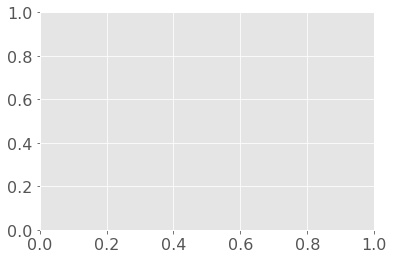

In [12]:
fig, ax = plt.subplots()

We can change the size of the image using the `figsize` argument.

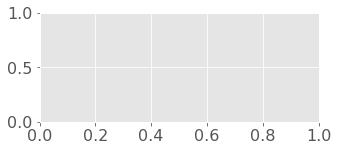

In [13]:
fig, ax = plt.subplots(figsize=(5, 2))  

We can also use `plt.subplots` to create a figure with **multiple** axes and plots.

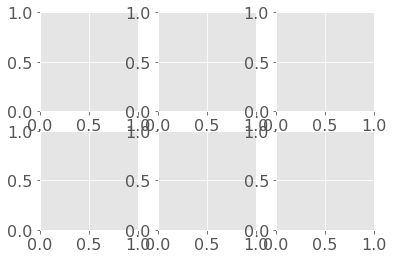

In [14]:
fig, axs = plt.subplots(2, 3)

Notice that I use `ax` to refer to a *single* axis, and *axs* to refer to *multiple* axes.  

Calling `fig.tight_layout()` after creating a figure will clean up the display so things don't overlap.

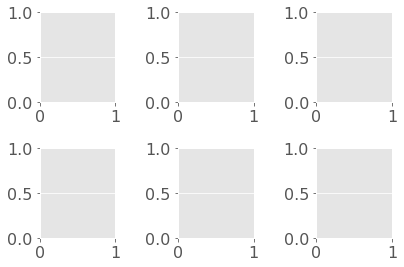

In [15]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

## Iterating Through Axes

When we have multiple axes, we would like some way to iterate through them and draw different images on each.

Here's how we can write some text to a single axis.

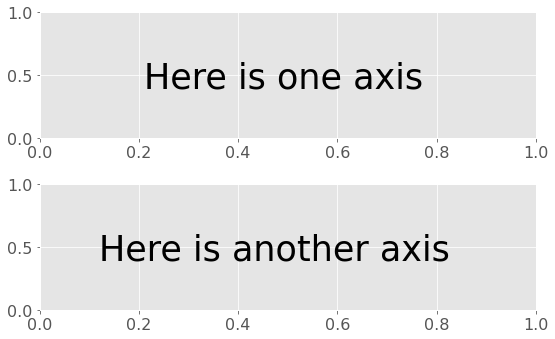

In [16]:
fig, axs = plt.subplots(2,1, figsize=(8, 5))
axs[0].text(0.21, 0.4, "Here is one axis", fontsize=35)
axs[1].text(0.12, 0.4, "Here is another axis", fontsize=35)
plt.tight_layout();

When we create multiple axes, they are stored in a multi-dimensional numpy array.  The usual case is in a 2-dimensional array, i.e, a matrix.

Shape = (2, 3)



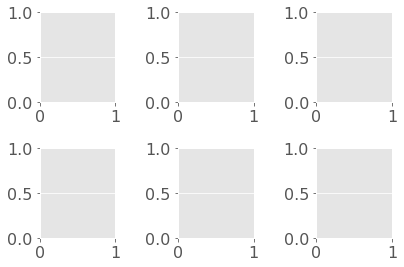

In [17]:
fig, axs = plt.subplots(2, 3)
plt.tight_layout()
print(f'Shape = {axs.shape}\n')
axs;

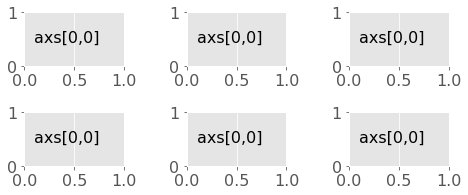

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(7,3))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.text(0.1, 0.45, f'axs[{0},{0}]', fontsize=16)
fig.tight_layout()

That double for loop could be really frustrating... If we try to avoid for loops, we should probably try to avoid double for loops. 

Luckily:

To iterate through all the different axes in turn, we can use the ```flatten``` method of a numpy array.

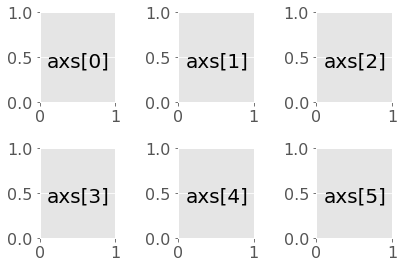

In [19]:
fig, axs = plt.subplots(2, 3)

for i, ax in enumerate(axs.flatten()):
    string_to_write = f"axs[{i}]"
    ax.text(0.1, 0.4, string_to_write, fontsize=20)
    #       ^ These were figured out through trial and error.
    
fig.tight_layout()

### Note: 
The pattern: 

 `for i, ax in enumerate(axs.flatten()):`
 
 *is an **extremely** useful pattern when working with matplotlib.*

## Titles and Labels

All professional plots should have titles and axis labels.  Here's how to make them.

Text(0.5, 1.0, 'This is a Great Plot!')

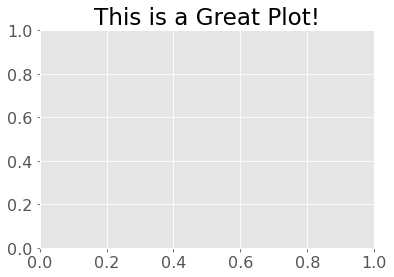

In [20]:
fig, ax = plt.subplots()
ax.set_title("This is a Great Plot!")

When using multiple axes, each axis can have its own title.

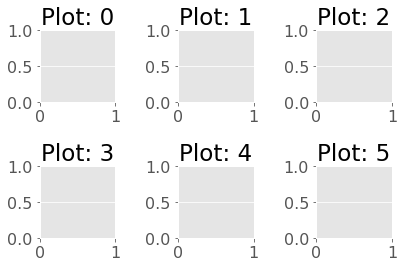

In [21]:
fig, axs = plt.subplots(2, 3)

for i, ax in enumerate(axs.flatten()):
    ax.set_title(f"Plot: {i}")

fig.tight_layout()

Axis labels use `ax.set_xlabel` and `ax.set_ylabel`.

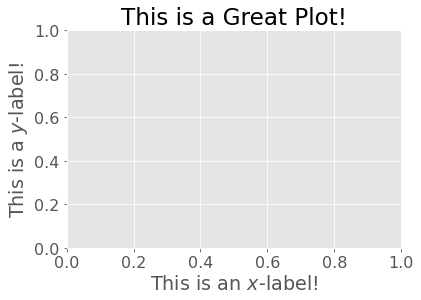

In [22]:
fig, ax = plt.subplots()
ax.set_title("This is a Great Plot!")
ax.set_xlabel("This is an $x$-label!")
ax.set_ylabel("This is a $y$-label!");

## Drawing Scatterplots

Scatterplots are the queen of data visualizations.  They show all the data, and never lie.

The `scatter` method in `pyplot` makes simple scatterplots.

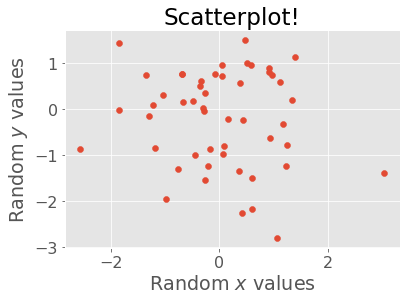

In [23]:
x = np.random.normal(size=50)
y = np.random.normal(size=50)

fig, ax = plt.subplots()
ax.scatter(x, y)

ax.set_title("Scatterplot!") # It is worth the time to make labels and titles
ax.set_xlabel("Random $x$ values")
ax.set_ylabel("Random $y$ values");

When there is a lot of data, adding transparency to the points can make the density more apparent.

''

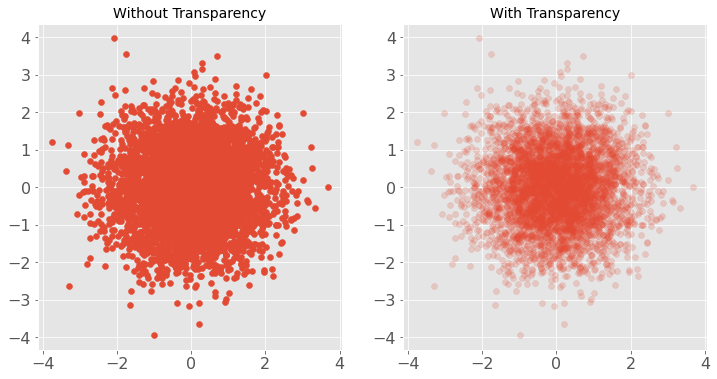

In [24]:
x = np.random.normal(size=5000)
y = np.random.normal(size=5000)

fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].scatter(x, y)
axs[0].set_title('Without Transparency', fontsize = 14)
axs[1].scatter(x, y, alpha=0.2);  # alpha controls transparency (0 is transparent; 1 is opaque)
axs[1].set_title('With Transparency', fontsize = 14)

#On your own, add x and y labels to both axs
#Feel free to set x and y axis to something like "Random Data"

;

### Example: Linear Regression Data

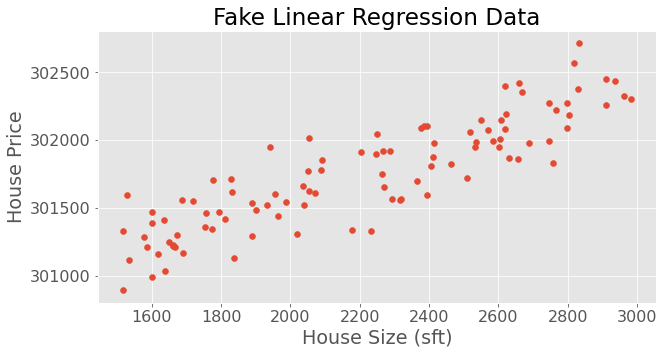

In [25]:
x = np.random.uniform(low = 1500, high = 3000, size=100)
y = 0.8*x + np.random.normal(loc = 300_000, scale=200, size=100) # These lines are just creating the data

fig, ax = plt.subplots(figsize = (10,5)) # Create the figure and axes
ax.scatter(x, y); # Create the scatterplot using the x and y data.
ax.set_title('Fake Linear Regression Data')
ax.set_title
ax.set_xlabel('House Size (sft)')
ax.set_ylabel("House Price");

### Example: Adding Color

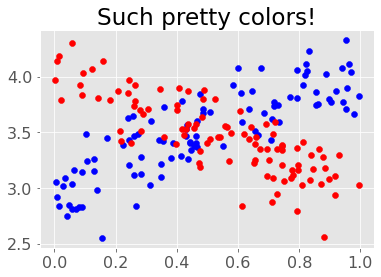

In [26]:
# Getting data
x_blue = np.random.uniform(size=100)
# y=mx+noise+b
y_blue = 1.0*x_blue + np.random.normal(scale=0.2, size=100)+3

x_red = np.random.uniform(size=100)
#y = mx+noise+b
y_red = -1.0*x_red + np.random.normal(scale=0.2, size=100)+4

# plotting
fig, ax = plt.subplots()
ax.scatter(x_blue, y_blue, color="b")
ax.scatter(x_red, y_red, color="r")
ax.set_title('Such pretty colors!');

### Breakout: Linear Regression Data, Different Slopes
1. Create a figure showing 6 different slopes on a figure.
2. Using different colors.
3. Label each axis with the slope used.
4. *Hint:* 

```x = np.random.uniform(-1, 1, size=50)
 y = slopes[i]*x + np.random.normal(scale=0.2, size=50)```

<!-- np.random.seed(42)
slopes = np.linspace(-2,2,6)
colors = ['r', 'b','c','k', 'g', 'm']
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

for i, ax in enumerate(axs.flatten()):
    x = np.random.uniform(-1, 1, size=50)
    y = slopes[i]*x + np.random.normal(scale=0.2, size=50)
    ax.scatter(x,y,color = colors[i])
    ax.set_ylim(-2,2)
    ax.set_title(f'Slope of: {round(slopes[i], 1)}')
plt.tight_layout() -->

## Drawing Line Plots

Line plots are almost as useful as scatterplots, they connect consecutive points in sequence by line segments.  Line plots can be made in `pyplot` using the `plot` method.

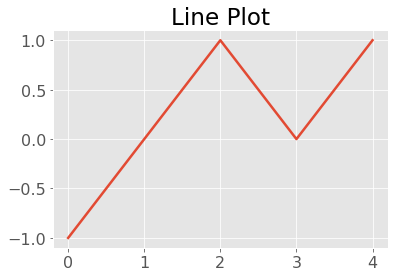

In [27]:
x = [0, 1, 2, 3, 4]
y = [-1, 0, 1, 0, 1]

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.5)
ax.set_title('Line Plot');

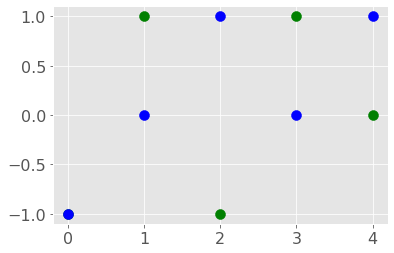

In [28]:
# generating random data 
x = [0, 1, 2, 3, 4]
y = [-1, 0, 1, 0, 1]
x1 = [0,1, 2, 3, 4]
y1= [-1, 1, -1, 1, 0]

# plotting
fig, ax = plt.subplots()

# ax.plot(x, y, color = 'red',linewidth=2.5)
ax.scatter(x, y, s=100, color='blue',zorder=3)

# ax.plot(x1, y1, color='yellow',linewidth=2.5)
ax.scatter(x1, y1, s=100, color='green',zorder=1);

A very useful application for line plots is plotting the graph of a function.

To accomplish these, we need to set up a one dimensional grid of numbers using `np.linspace`.

In [29]:
np.linspace(0, 1, num=11) # Note that `linspace` INCLUDES the second argument

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

After setting up a fine enough grid, we can plot the graph of a function using:
    
```python
ax.plot(x, f(x))
```

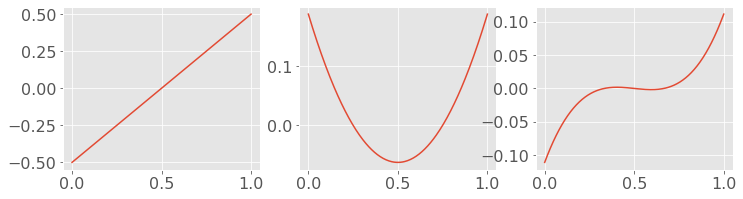

In [30]:
linear = lambda x: x - 0.5
quadratic = lambda x: (x - 0.25)*(x - 0.75)
cubic = lambda x: (x - 0.333)*(x - 0.5)*(x - 0.666)
functions = [linear, quadratic, cubic]

# Set up the grid.
x = np.linspace(0, 1, num=250)

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for f, ax in zip(functions, axs.flatten()):
    ax.plot(x, f(x))

A common issue occurs when the data gets out of order, which turns the line plots into a mess of random points.

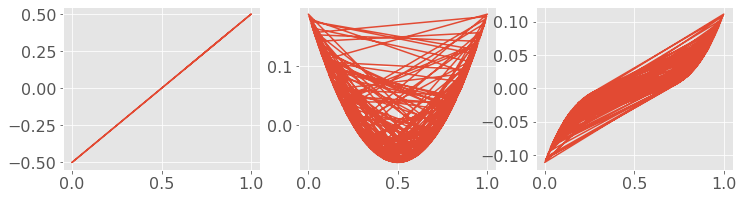

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for f, ax in zip(functions, axs.flatten()):
    np.random.shuffle(x)
    ax.plot(x, f(x))

### Example: Linear Regression Data, Different Slopes, With Lines

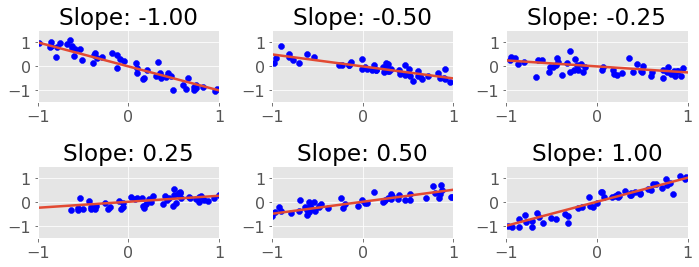

In [32]:
slopes = [-1.0, -0.5, -0.25, 0.25, 0.5, 1.0]
x_linspace = np.linspace(-1, 1, num=250)

fig, axs = plt.subplots(2, 3, figsize=(10, 4))

for i, ax in enumerate(axs.flatten()):
    x = np.random.uniform(-1, 1, size=50)
    y = slopes[i]*x + np.random.normal(scale=0.2, size=50)
    ax.plot(x_linspace, slopes[i]*x_linspace, linewidth=2.5)
    ax.scatter(x, y, color="blue")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title("Slope: {:2.2f}".format(slopes[i]))
    
fig.tight_layout()

## Drawing Bar Charts

A bar chart is useful for comparing the same measurement across multiple categories.

In [33]:
record_counts = pd.DataFrame(
    {'count': [135, 40, 20, 30, 15], 
     'genre': ['rock', 'metal', 'jazz', 'rap', 'classical']}
)

To make a bar chart, we need to:
  - create a sequence of x positions using `np.arange`.
  - Set the x-ticks to the middle of the bars using `ax.set_xticks`.
  - Set the labels of the x-ticks using `ax.set_xtickslabels`.

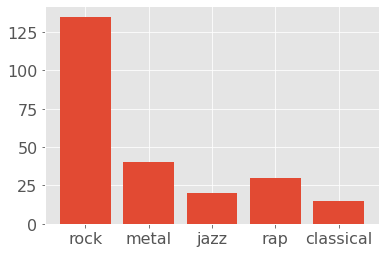

In [34]:
# x will be the left hand edge of the bars.
x = np.arange(len(record_counts['genre']))

fig, ax = plt.subplots()

ax.bar(x, record_counts['count'])
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(record_counts['genre']);

## Modularizing With Functions

When organizing our code, we often would like to break the task of creating a complex figure into subtasks, which we encapsulate in functions.

The main pattern used when creating plots with matplotlib using function is to **pass an axis into the function, then modify the axis**.

This results in functions like:

```python
def add_something_to_a_plot(ax, data_arguments..., style_arguments...)
```

We recommend:

  - Always making the *first* argument of the function the axis to be modified.
  - Always making the arguments following the axis accept the data needed to add the feature to the plot.
  - Always making the remaining arguments stylistic controls for the plot.
  
Being consistent here will reduce your mental load when using the functions and sharing them with others.

### Example: Two Scatter Plots With a Boundary

Let's break down the process of creating the following plot into a few functions.

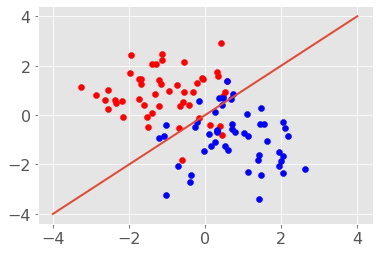

In [35]:
# These will eventually become the arguments to our functions.
red_points_center = (-1, 1)
n_red_points = 50
blue_points_center = (1, -1)
n_blue_points = 50
boundary_line_intercept = 0
boundary_line_slope = 1
boundary_line_range = (-4, 4)

fig, ax = plt.subplots()

# Make the red scatter plot
red_x = np.random.normal(loc=red_points_center[0], size=n_red_points)
red_y = np.random.normal(loc=red_points_center[1], size=n_red_points)
ax.scatter(red_x, red_y, color='red')

# Make the blue scatter plot
blue_x = np.random.normal(loc=blue_points_center[0], size=n_blue_points)
blue_y = np.random.normal(loc=blue_points_center[1], size=n_blue_points)
ax.scatter(blue_x, blue_y, color='blue')

# Make the seperating line
x_linspace = np.linspace(boundary_line_range[0], boundary_line_range[1], num=250)
ax.plot(x_linspace,
        boundary_line_slope*x_linspace + boundary_line_intercept,
        linewidth=2);

The code above works, and is clear enough, but is not at all reusable, so let's break it up into some components.

We will write two functions:
  - One function will draw a scatterplot at a given center, with a given color.
  - One function will draw a line across a given range, with a given intercept and slope.
  
```python
def draw_scatterplot(ax, center, size, color)
def draw_line(ax, x_range, intercept, slope)
```

In [36]:
def draw_scatterplot(ax, center, size, color):
    x = np.random.normal(loc=center[0], size=size)
    y = np.random.normal(loc=center[1], size=size)
    ax.scatter(x, y, color=color, label=color+' data points')
    
def draw_line(ax, x_range, intercept, slope):
    x = np.linspace(x_range[0], x_range[1], num=250)
    ax.plot(x, slope*x + intercept, linewidth=2, label='decision boundary')

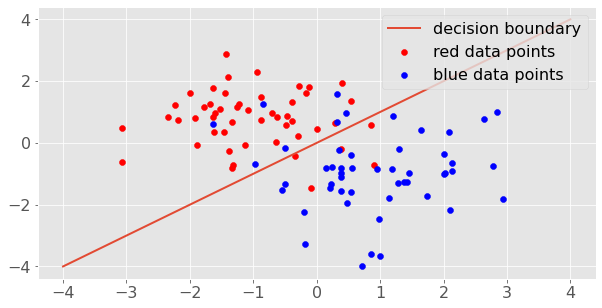

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

draw_scatterplot(ax, (-1, 1), 50, 'red')
draw_scatterplot(ax, (1, -1), 50, 'blue')
draw_line(ax, (-4, 4), 0, 1)

ax.legend(loc='upper right');        # default legend is 'best'
#ax.legend(bbox_to_anchor=(0,1.))   # 2-tuple use in conjunction with loc to control location of legend 
                                    # 4-tuple could be used as well; controls (x,y,width,height)
#ax.legend(loc='lower right', bbox_to_anchor=(0,1))

### Controlling legends 

There are two main parameters that control the location of the legend, `loc` and `bbox_to_anchor`. 

#### Loc 

Loc controls the location of the corner of the legend. Below are strings and numbers you can use to as parameters for loc.

|Location String | Location Code|
|----------------|--------------|
|'best'|              0|
|'upper right' 	|      1
   | 'upper left' |	      2
  |  'lower left' 	  |    3
   | 'lower right' 	 |     4
   | 'right' 	      |    5
   | 'center left' 	  |   6
   | 'center right'   |	      7
   | 'lower center'   |      8
   | 'upper center'   |	      9
   | 'center' 	      |    10

#### bbox_to_anchor 

`bbox_to_anchor` to controls the location of the box in coordination with loc. You can use a 2-tuple or 4-tuple of floats.  The 2-tuple controls the (x,y) coordinates of box.  The 4-tuple controls the (x,y,width,height) 


## Twin Axes 

In [38]:
# get x-values for plotting
x = np.arange(1,11)

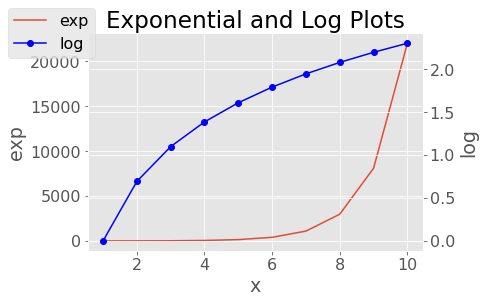

In [39]:
fig, ax = plt.subplots()
ax.plot(x,np.exp(x))
ax.set_ylabel('exp')
ax.set_xlabel('x')
ax2 = ax.twinx()
ax2.plot(x, np.log(x),'bo-') # 'bo-': blue circle connected via line
ax2.set_ylabel('log')
ax.set_title('Exponential and Log Plots')
fig.legend(labels = ('exp','log'),loc='upper left');

## Heat Maps (imshow)
Heat Maps are a graphical representation of data where values are depicted by color hue and intensity.


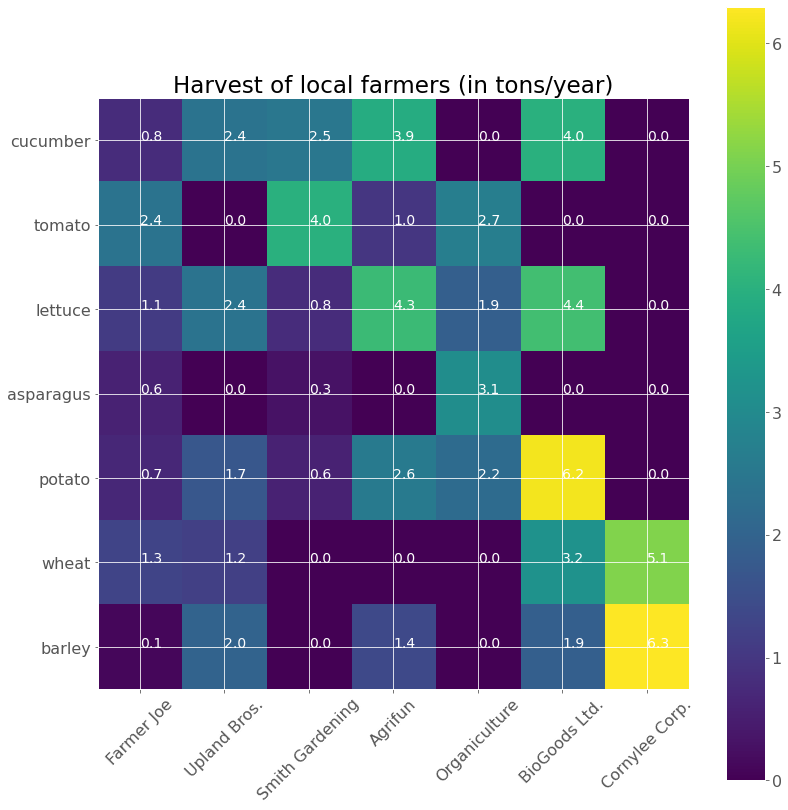

In [40]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(harvest)
cbar = ax.figure.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45) #, ha="right") #,  # setp --> set preferences
                            

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j], color="w",fontsize=14)
                       #ha="center", va="center", color="w",fontsize=14)
# va -->'center' | 'top' | 'bottom' | 'baseline'
# ha -->'center' | 'right' | 'left' 
                                                    

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()

## Histogram 

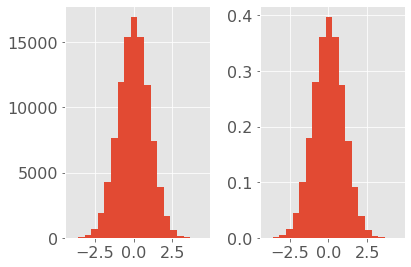

In [41]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 
x = np.random.randn(N_points)

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(x, bins=n_bins, density=True);

## Does it ever make sense to use *plot*?

There is one other way you can interact with matplotlib -- via plot, a minimal fast high level interface.  Below is an example:

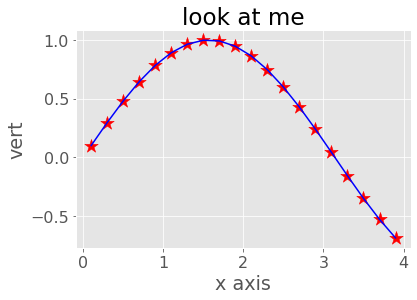

In [42]:
# create data 
x_data = np.arange(0.1, 4, .2)
y_data_1 = np.sin(x_data)

# create plot 
plt.plot(x_data, y_data_1,c='b')
plt.scatter(x_data, y_data_1,c='r',marker='*',s=200)
plt.title("look at me")
plt.xlabel('x axis')
plt.ylabel('vert');

## So should we use plt? 

The "functional" `plt` interface is fine for simple plots.

However, as soon as you want fine-grained control over each aspect of your figure (especially if it has more than one set of axes), you will find the OO interface (what was introduced first) vastly less frustrating. 

## Shortcuts from Pandas

When your data is in a `pandas.DataFrame`, there are shortcuts available for some common tasks.

In [43]:
golf_df = pd.read_csv('data/playgolf.csv', sep='|')

FileNotFoundError: [Errno 2] File data/playgolf.csv does not exist: 'data/playgolf.csv'

In [ ]:
golf_df.head()

In [ ]:
golf_df.plot(kind="bar");

Calling the plot method on a pandas series returns a familiar matplotlib axes object, which we can continue to modify.

In [ ]:
ax = golf_df['Temperature'].plot(kind="line")
ax.set_xlabel('index of dataframe')
ax.set_ylabel('Temperature');

In [ ]:
fig, ax_list = plt.subplots(2,1, figsize=(10,10))

cols = ['Humidity','Temperature']
for axexp, col in zip(ax_list.flatten(), cols):
    golf_df[col].plot(ax=axexp)
    axexp.set_ylabel(col)
    axexp.set_xlabel('index')
#top_ax = ax_list[0];

In [ ]:
pd.plotting.scatter_matrix(golf_df[['Temperature','Humidity']], figsize=(10, 10), s=100);

In [ ]:
mask = (golf_df['Result'] == 'Play')

In [ ]:
mask.head()

In [ ]:
~mask.head()

In [ ]:
golf_df[mask].head()

In [ ]:
ax = golf_df[mask].hist('Temperature', color='blue', alpha=0.4)  # Play
golf_df[~mask].hist('Temperature', color='gray', alpha=0.4, ax=ax);  # Don't Play 

# Review Success Criteria

I can ...

1. State why matplotlib and Jupyter pair well together.
2. Name, recognize, and use the two interfaces to matplotlib.
3. Be able to import `pyplot` and set up a professional style.
4. Understand subplots, figures, and axes. 
5. State the syntax needed to:
    - Make titles and labels.
    - Draw scatterplots on an axis.
    - Draw line plots on an axis.
    - Draw a bar chart on an axis.

# Apendex
## For Your Reference!!

### Figure Options

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [ ]:
#create data
x = np.linspace(0, 5, 10)
y = x ** 2

In [ ]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [ ]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [ ]:
fig.savefig("filename.png", dpi=200)

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command). In some cases, PGF can also be good alternative.

### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [ ]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [ ]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

In [ ]:
ax.legend(["curve1", "curve2", "curve3"]);

The method described above follows the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 

In [ ]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common `loc` values are:

In [ ]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

The following figure shows how to use the figure title, axis labels and legends described above:

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### Formatting text: LaTeX, fontsize, font family

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication. First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the font size to appear right in a publication.

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [ ]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

A good choice of global fonts are the STIX fonts: 

In [ ]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [ ]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### Setting colors, linewidths, linetypes

#### Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

In [ ]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--'); # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55");       # RGB hex code for a greenish color

#### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

#### Scientific notation

With large numbers on axes, it is often better use scientific notation:

In [ ]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Axis number and axis label spacing

In [ ]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [ ]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

In [ ]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Axis spines

We can also change the properties of axis spines:

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where x and y is zero

In [ ]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [ ]:
n = np.array([0,1,2,3,4,5])

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

In [ ]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

In [ ]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

### Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

In [ ]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots

In [ ]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

In [ ]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures:

In [ ]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Colormap and contour figures

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [ ]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [ ]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

In [ ]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), shading='auto')
cb = fig.colorbar(p, ax=ax)

#### imshow

In [ ]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

In [ ]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D figures

To use 3D graphics in matplotlib, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

In [ ]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Wire-frame plot

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Coutour plots with projections

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### Change the view angle

We can change the perspective of a 3D plot using the `view_init` method, which takes two arguments: `elevation` and `azimuth` angle (in degrees):

In [ ]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.


Much credit due: J.R. Johansson (jrjohansson at gmail.com)